In [2]:
!rg -n "AutoDeco model registered" -S ~/SimpleDeco/simpledeco_vllm

/home/zli/SimpleDeco/simpledeco_vllm/vllm/model_executor/models/templlm_auto.py
920:print("AutoDeco model registered with transformers (AutoConfig, AutoModel, AutoModelForCausalLM)")


In [3]:
import vllm.model_executor.models.templlm_auto as autodeco_mod

INFO 02-27 19:12:26 [__init__.py:216] Automatically detected platform cuda.
AutoDeco model registered with transformers (AutoConfig, AutoModel, AutoModelForCausalLM)


In [4]:
from transformers import AutoConfig
cfg = AutoConfig.from_pretrained("ckpt/autodeco-qwen3-4b-thinking-merged", trust_remote_code=True)
print("cfg base_model_type:", getattr(cfg, "base_model_type", None))

cfg base_model_type: qwen3


### Model Weight Inspection

### AIME24 Sample Analysis (SimpleDeco)

In [11]:
from iv2_utils.iv2 import jsonl_read
from datasets import load_dataset, Dataset

In [19]:
samples = Dataset.from_list(jsonl_read('ckpt/simpledeco_aime24_handsoff_samples_seed49.jsonl'))

samples

Dataset({
    features: ['prompt', 'response', 'metadata'],
    num_rows: 480
})

In [21]:
def add_tokens_row(row):
    return {'token_count': len(row['metadata']['temp'])}

samples = samples.map(add_tokens_row, num_proc = 4)

samples

Map (num_proc=4):   0%|          | 0/480 [00:00<?, ? examples/s]

Dataset({
    features: ['prompt', 'response', 'metadata', 'token_count'],
    num_rows: 480
})

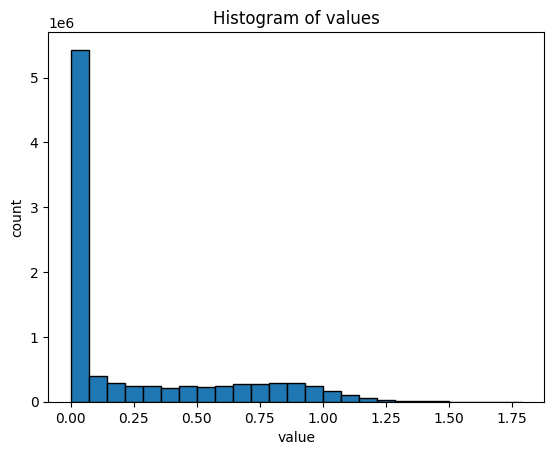

In [27]:
temperatures = []

for row in samples:
    temperatures += row['metadata']['temp']

plt.hist(temperatures, bins=25, edgecolor="black")   # adjust `bins` as you like
plt.xlabel("value")
plt.ylabel("count")
plt.title("Histogram of values")
plt.show()

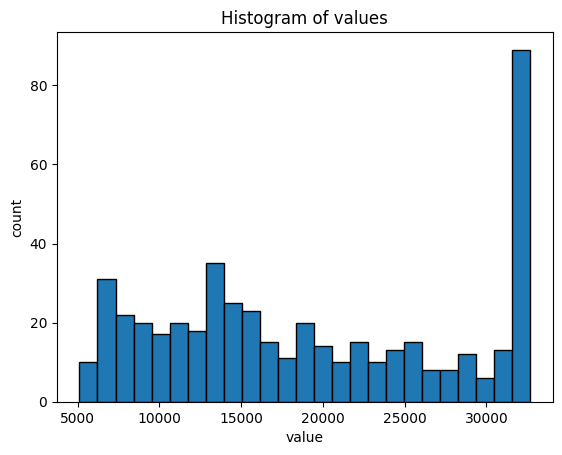

In [26]:
import matplotlib.pyplot as plt

values = samples['token_count']

# plot the histogram
plt.hist(values, bins=25, edgecolor="black")   # adjust `bins` as you like
plt.xlabel("value")
plt.ylabel("count")
plt.title("Histogram of values")
plt.show()

In [34]:
samples[3]['metadata']

{'ckpt_name': 'simpledeco-qwen3-4b-thinking-merged',
 'dataset': 'aime24',
 'ground_truth': '204',
 'max_tokens': 32768,
 'mode': 'maj@k',
 'model_name_or_path': 'ckpt/simpledeco-qwen3-4b-thinking-merged/',
 'problem_index': 0,
 'rp': 1.0,
 'sample_index': 3,
 'score': 1.0,
 'seed': 49,
 'temp': [0.1630859375,
  0.04736328125,
  0.083984375,
  0.51953125,
  0.0024871826171875,
  0.271484375,
  0.1416015625,
  0.0025634765625,
  0.1884765625,
  0.396484375,
  0.083984375,
  0.0172119140625,
  0.005615234375,
  0.1474609375,
  0.30859375,
  0.002655029296875,
  0.35546875,
  0.55859375,
  0.022705078125,
  1.9073486328125e-05,
  0.035888671875,
  0.29296875,
  0.01611328125,
  0.1201171875,
  0.4609375,
  0.322265625,
  0.205078125,
  0.0107421875,
  0.03271484375,
  0.482421875,
  0.76171875,
  0.75390625,
  0.0003814697265625,
  0.035888671875,
  0.0299072265625,
  0.00029754638671875,
  0.005767822265625,
  0.000690460205078125,
  1.0234375,
  1.109375,
  0.98046875,
  0.041259765625,

In [32]:
print(samples[3]['response'])

This is a complex or challenging question, and it is difficult to provide a direct and correct answer. I need to think about it.
Well, let's tackle this problem step by step. So, first, let's make sure I understand what's given and what's being asked. Aya walks 9 kilometers every morning, stops at a coffee shop for t minutes, and the total time for the walk (including coffee shop) depends on her speed. Wait, actually, the problem says "the walk takes her 4 hours, including t minutes spent in the coffee shop." Hmm, so maybe I need to clarify: is the "walk" the time she's walking, or is the total time from start to finish (walking plus coffee shop) called the "walk takes her"? Wait, no, let's read again carefully.

"When she walks at a constant speed of s kilometers per hour, the walk takes her 4 hours, including t minutes spent in the coffee shop." Wait, that wording is a bit confusing. Maybe it's better to parse it as: The time she spends from when she starts walking until she finishes